In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
geo_ev_data = pd.read_csv('/content/India_Geo_EV_data.csv')

In [33]:
geo_ev_data.head()
geo_ev_data.describe()
geo_ev_data.info()
geo_ev_data.tail()
geo_ev_data.isnull()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       412 non-null    object 
 1   latitude   412 non-null    float64
 2   longitude  412 non-null    float64
 3   country    409 non-null    object 
 4   Cluster    412 non-null    int32  
dtypes: float64(2), int32(1), object(2)
memory usage: 14.6+ KB


,city,latitude,longitude,country,Cluster
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
407,False,False,False,False,False
408,False,False,False,False,False
409,False,False,False,True,False
410,False,False,False,True,False


In [3]:
features_geo_ev = geo_ev_data[['latitude', 'longitude']]

In [4]:
scaler = StandardScaler()
scaled_features_geo_ev = scaler.fit_transform(features_geo_ev)

In [5]:
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=0)
    kmeans.fit(scaled_features_geo_ev)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

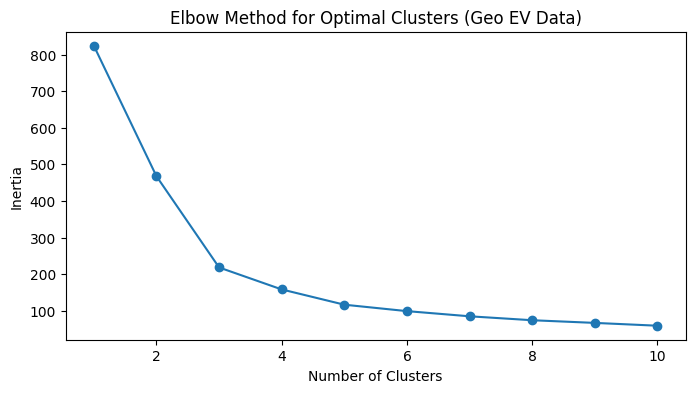

In [6]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters (Geo EV Data)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [7]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
geo_ev_data['Cluster'] = kmeans.fit_predict(scaled_features_geo_ev)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


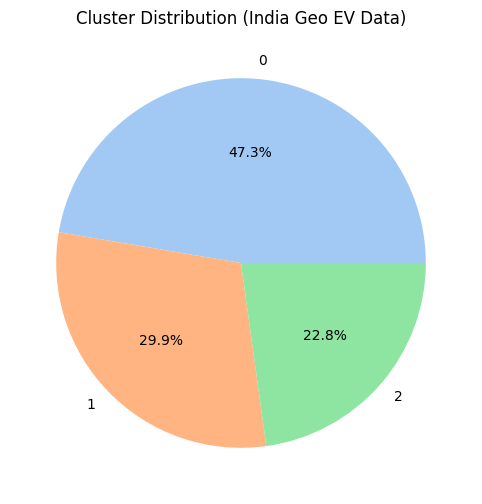

In [8]:
cluster_counts = geo_ev_data['Cluster'].value_counts()
plt.figure(figsize=(8, 6))
cluster_counts.plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Cluster Distribution (India Geo EV Data)')
plt.ylabel('')
plt.show()

<ipython-input-9-7153dbad1b0c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=geo_ev_data, palette='viridis')


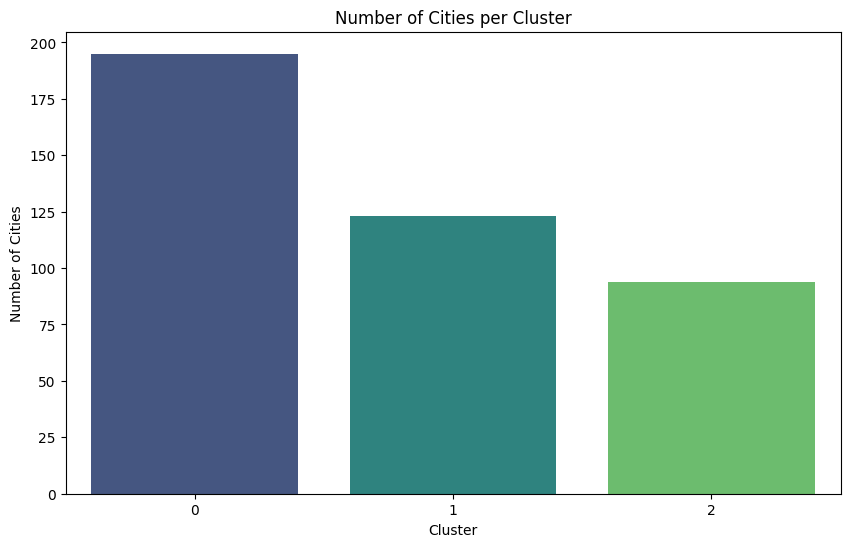

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=geo_ev_data, palette='viridis')
plt.title('Number of Cities per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Cities')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


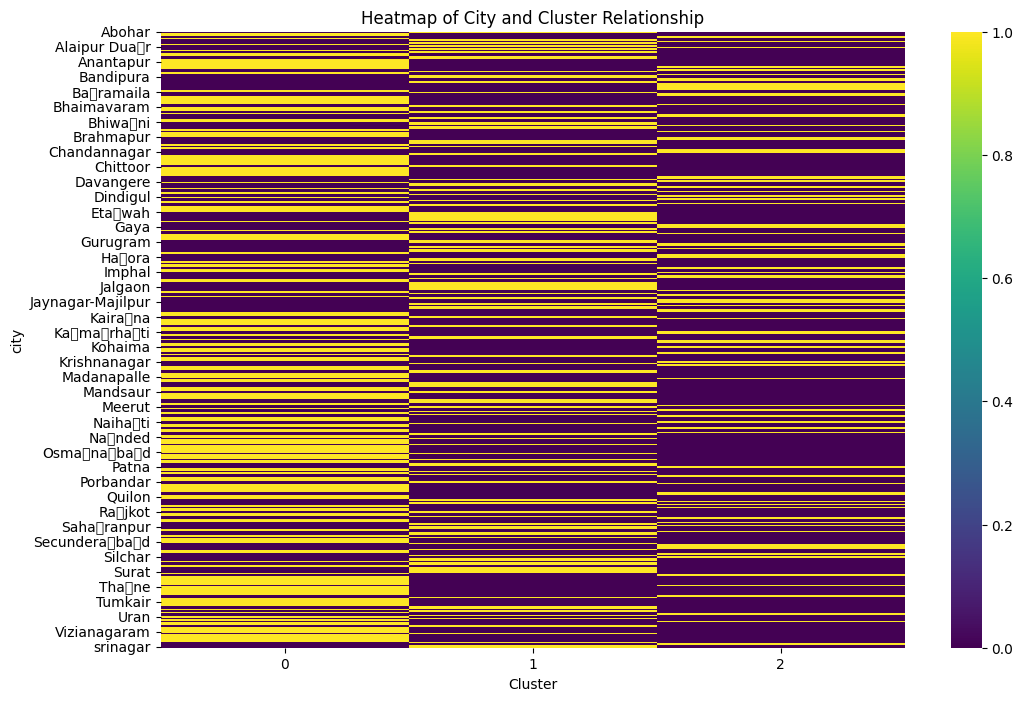

In [10]:
pivot_table = geo_ev_data.pivot_table(index='city', columns='Cluster', aggfunc='size', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='viridis')
plt.title('Heatmap of City and Cluster Relationship')
plt.show()

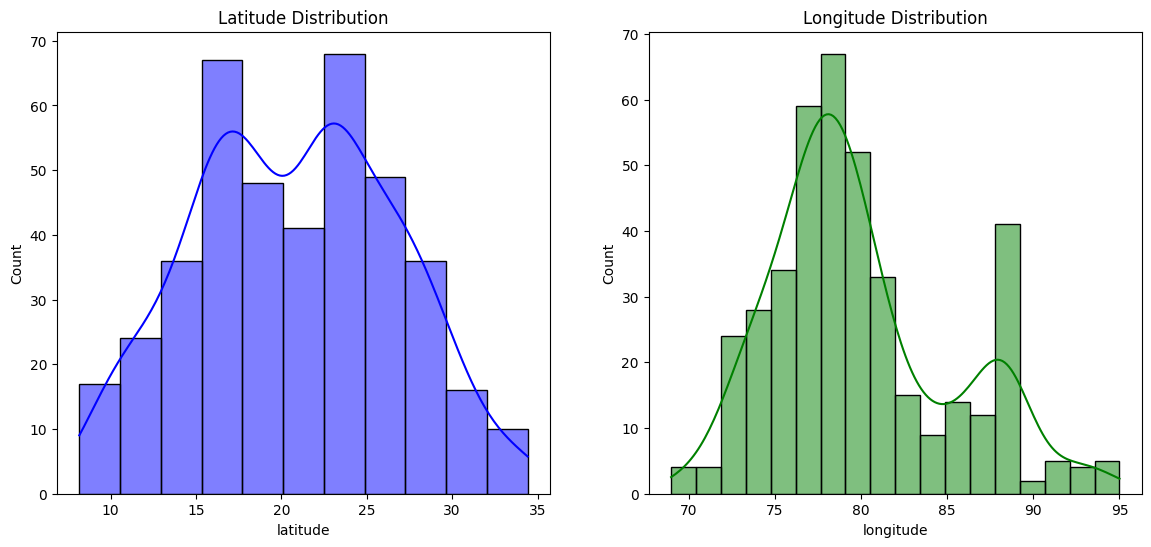

In [11]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(geo_ev_data['latitude'], kde=True, color='blue')
plt.title('Latitude Distribution')
plt.subplot(1, 2, 2)
sns.histplot(geo_ev_data['longitude'], kde=True, color='green')
plt.title('Longitude Distribution')
plt.show()

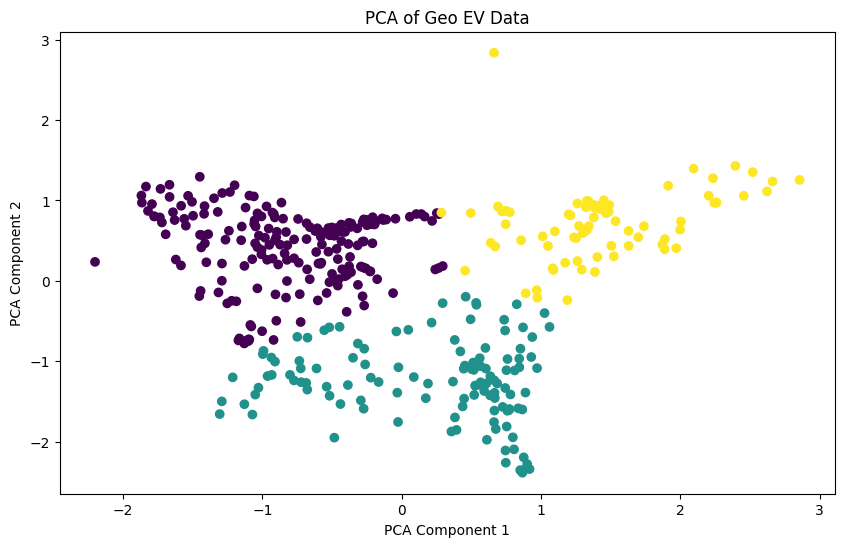

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features_geo_ev)
plt.figure(figsize=(10, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=geo_ev_data['Cluster'], cmap='viridis')
plt.title('PCA of Geo EV Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

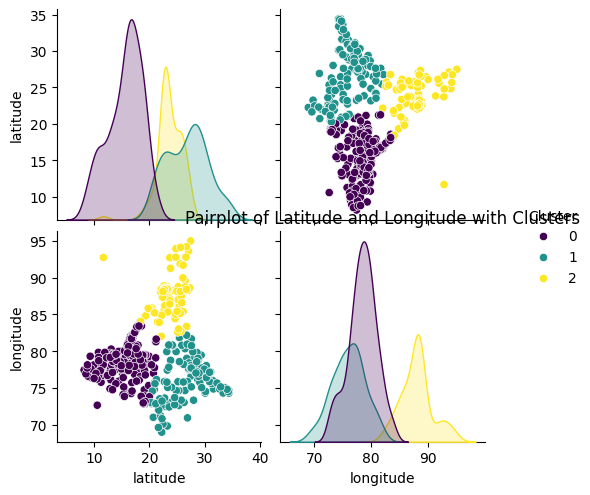

In [13]:
sns.pairplot(geo_ev_data, vars=['latitude', 'longitude'], hue='Cluster', palette='viridis')
plt.title('Pairplot of Latitude and Longitude with Clusters')
plt.show()

<ipython-input-14-b015d778380c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='latitude', data=geo_ev_data, palette='viridis')
<ipython-input-14-b015d778380c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='longitude', data=geo_ev_data, palette='viridis')


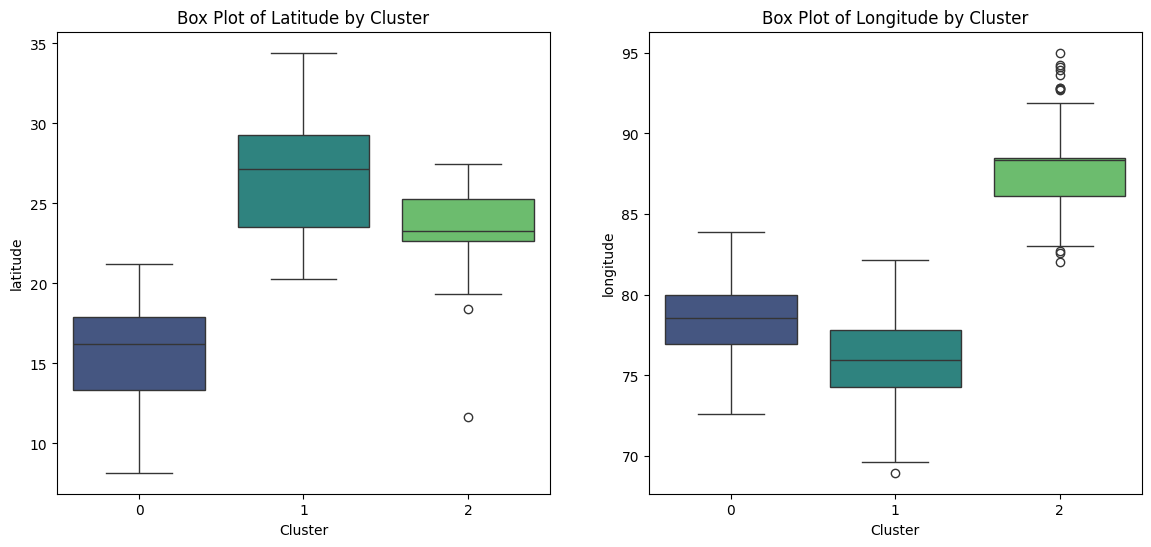

In [14]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Cluster', y='latitude', data=geo_ev_data, palette='viridis')
plt.title('Box Plot of Latitude by Cluster')
plt.subplot(1, 2, 2)
sns.boxplot(x='Cluster', y='longitude', data=geo_ev_data, palette='viridis')
plt.title('Box Plot of Longitude by Cluster')
plt.show()

<ipython-input-15-cf77ef60eab6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y='latitude', data=geo_ev_data, palette='viridis')
<ipython-input-15-cf77ef60eab6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y='longitude', data=geo_ev_data, palette='viridis')


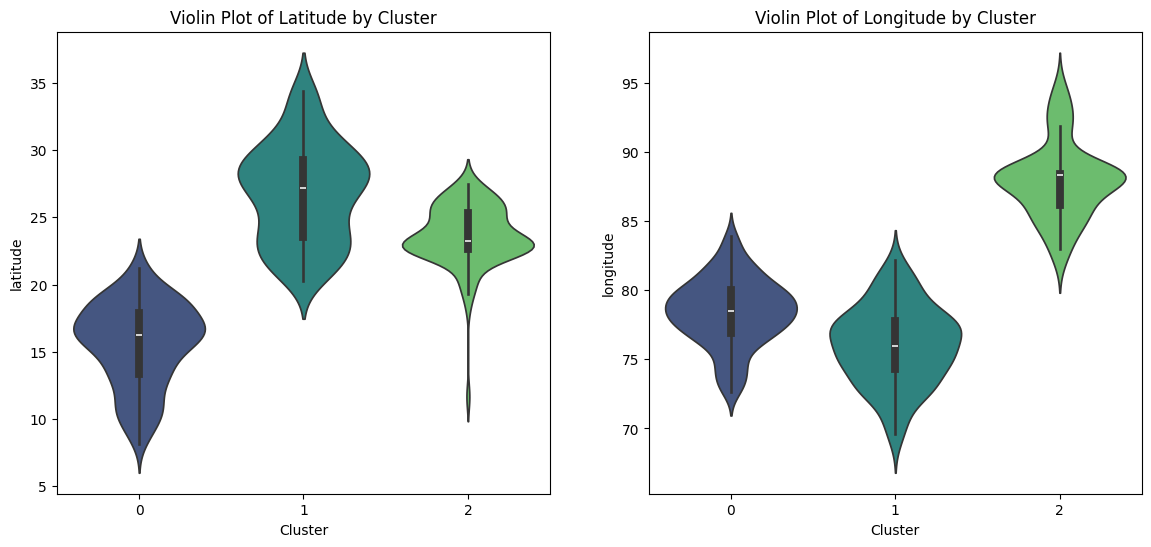

In [15]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.violinplot(x='Cluster', y='latitude', data=geo_ev_data, palette='viridis')
plt.title('Violin Plot of Latitude by Cluster')
plt.subplot(1, 2, 2)
sns.violinplot(x='Cluster', y='longitude', data=geo_ev_data, palette='viridis')
plt.title('Violin Plot of Longitude by Cluster')
plt.show()

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
ev_sales_data = pd.read_excel('/content/Ev Sales.xlsx')
ev_sales_data.head()
ev_sales_data.info()
ev_sales_data.describe()
ev_sales_data.isnull()
ev_sales_data.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   YEAR    74 non-null     datetime64[ns]
 1   2 W     74 non-null     int64         
 2   3 W     74 non-null     int64         
 3   4 W     74 non-null     int64         
 4   BUS     74 non-null     int64         
 5   TOTAL   74 non-null     int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 3.6 KB


,YEAR,2 W,3 W,4 W,BUS,TOTAL
69,2023-01-01,64649,34308,3490,98,102545
70,2023-02-01,66033,35995,4850,99,106977
71,2023-03-01,86194,45225,8852,89,140360
72,2023-04-01,66755,38016,6193,84,111048
73,2023-05-01,105154,44615,7736,283,157788


In [18]:
ev_sales_data['YEAR'] = pd.to_datetime(ev_sales_data['YEAR']).dt.year

In [19]:
numeric_columns = ['YEAR', 'TOTAL', '2 W', '3 W', '4 W', 'BUS']
features_ev_sales = ev_sales_data[numeric_columns]

In [20]:
features_ev_sales = features_ev_sales.apply(pd.to_numeric, errors='coerce')
features_ev_sales = features_ev_sales.dropna()

In [21]:
scaler = StandardScaler()
scaled_features_ev_sales = scaler.fit_transform(features_ev_sales.drop('YEAR', axis=1))

In [22]:
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=0)
    kmeans.fit(scaled_features_ev_sales)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

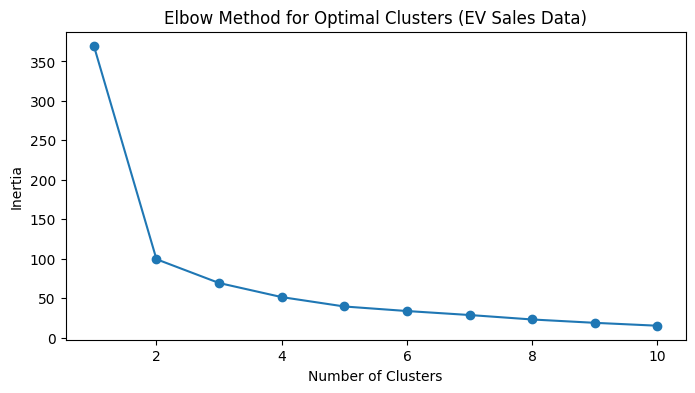

In [23]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters (EV Sales Data)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [24]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
ev_sales_data['Cluster'] = kmeans.fit_predict(scaled_features_ev_sales)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


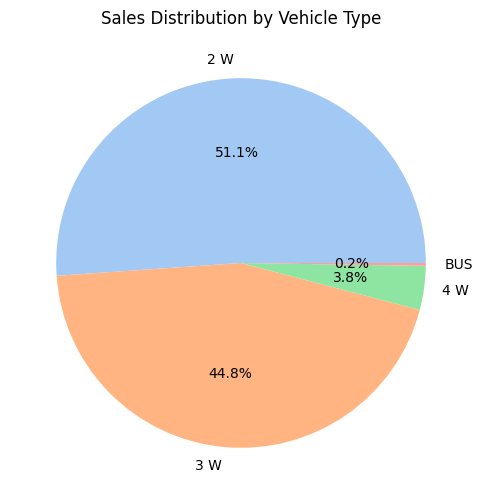

In [25]:
sales_types = features_ev_sales[['2 W', '3 W', '4 W', 'BUS']].sum()
plt.figure(figsize=(8, 6))
sales_types.plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Sales Distribution by Vehicle Type')
plt.ylabel('')
plt.show()

<ipython-input-26-8d4590b90eb4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='YEAR', y='TOTAL', data=features_ev_sales, palette='viridis')


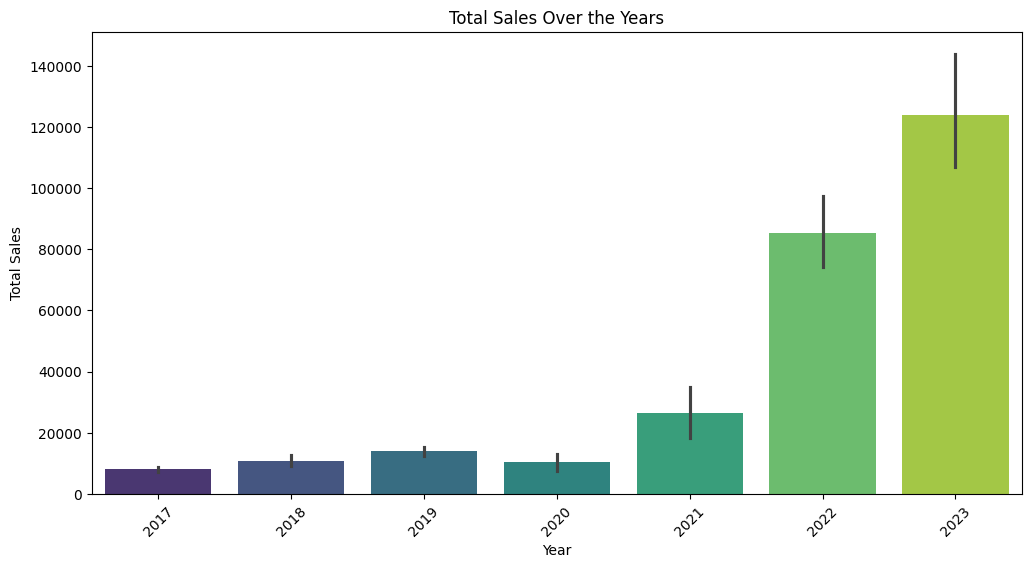

In [26]:
plt.figure(figsize=(12, 6))
sns.barplot(x='YEAR', y='TOTAL', data=features_ev_sales, palette='viridis')
plt.title('Total Sales Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

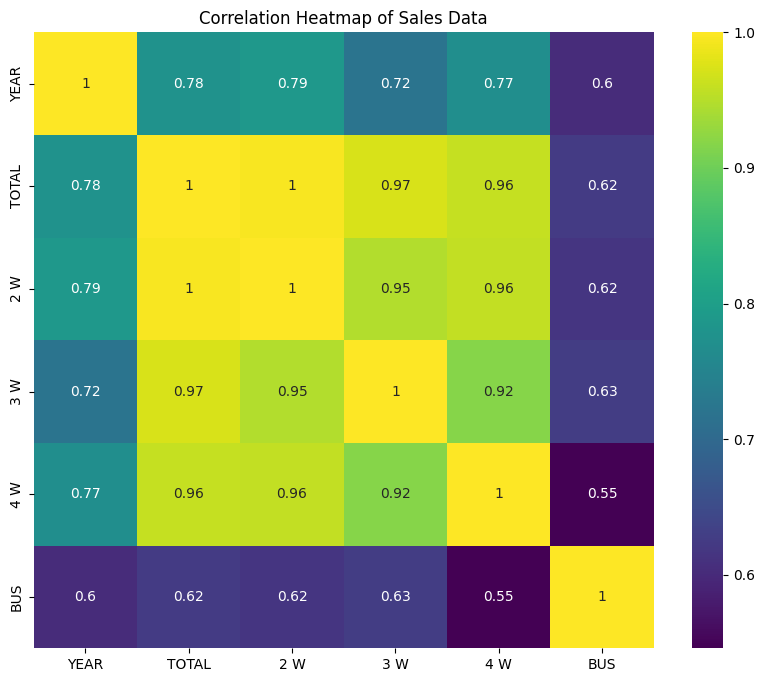

In [27]:
plt.figure(figsize=(10, 8))
sns.heatmap(features_ev_sales.corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap of Sales Data')
plt.show()

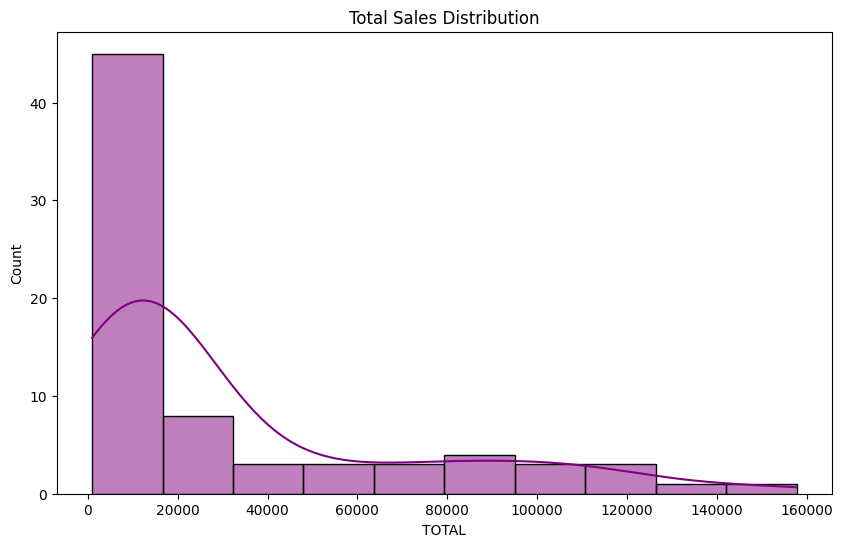

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(features_ev_sales['TOTAL'], kde=True, color='purple')
plt.title('Total Sales Distribution')
plt.show()

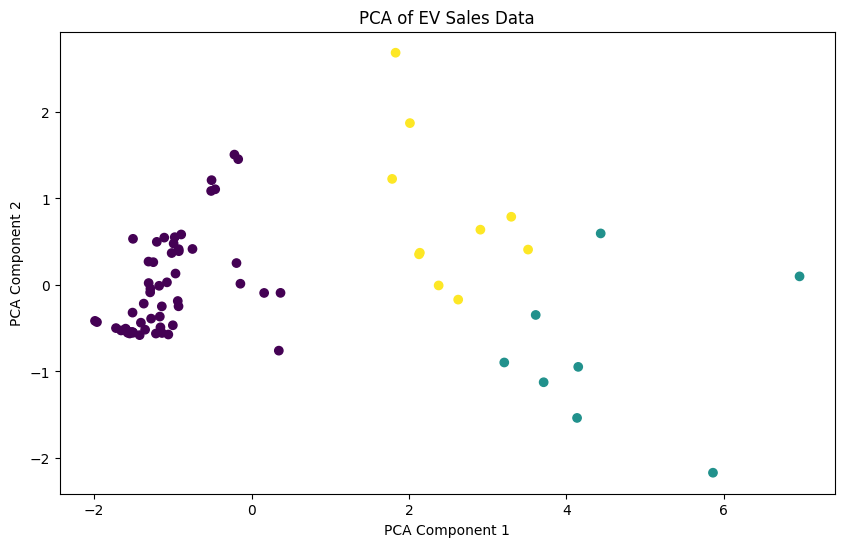

In [29]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features_ev_sales)
plt.figure(figsize=(10, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=ev_sales_data['Cluster'], cmap='viridis')
plt.title('PCA of EV Sales Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable h

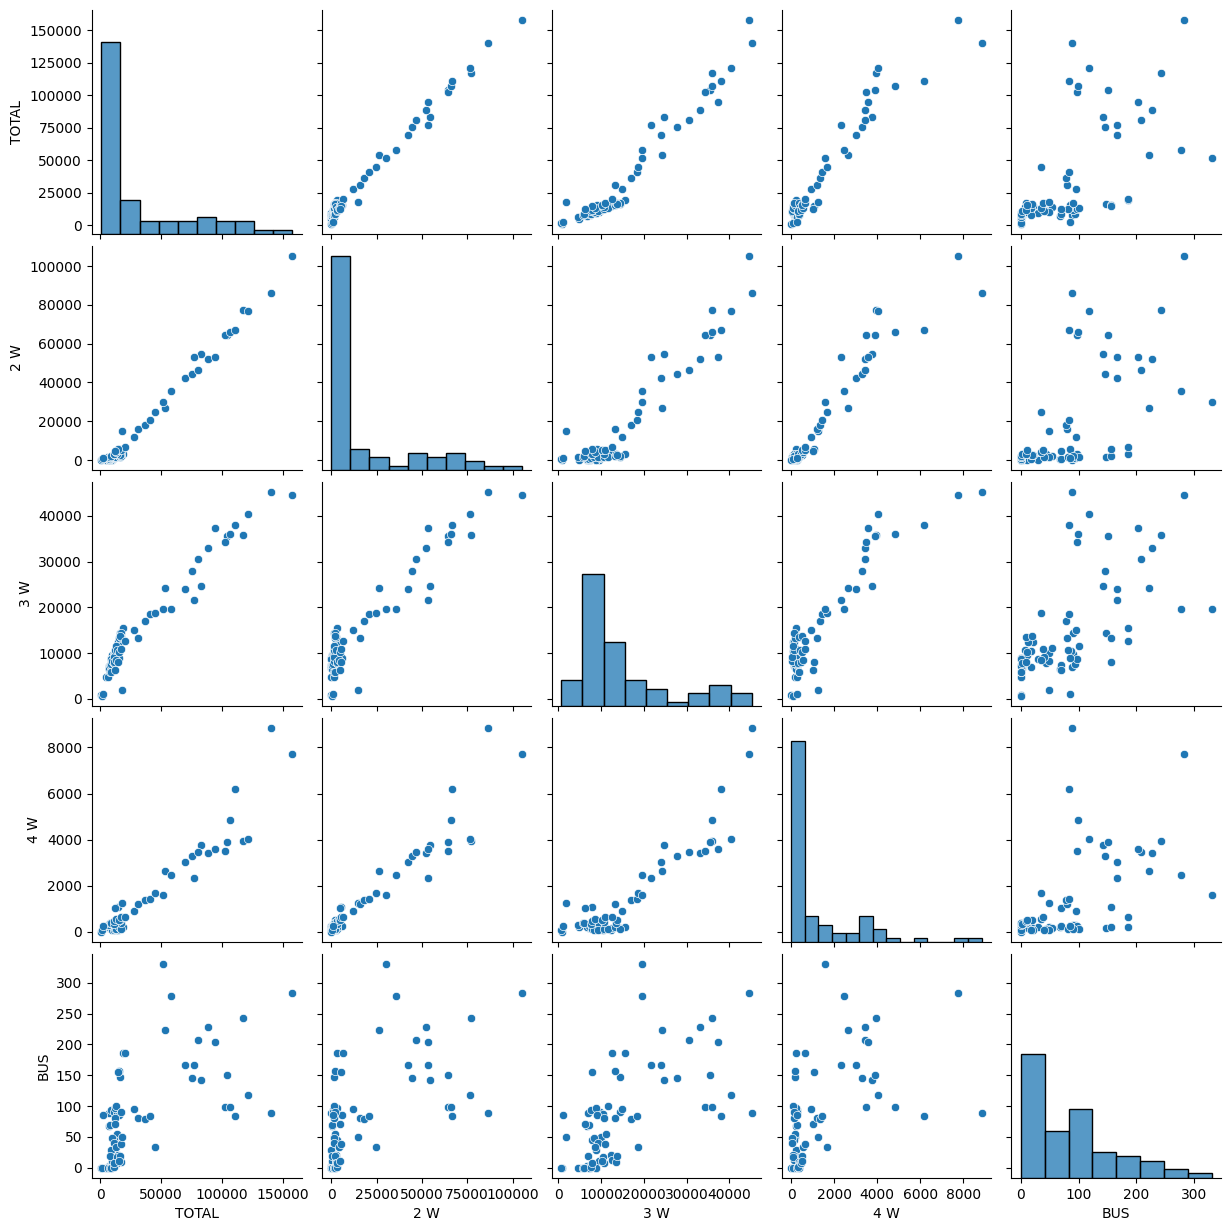

In [30]:
sns.pairplot(features_ev_sales, vars=['TOTAL', '2 W', '3 W', '4 W', 'BUS'], palette='viridis')
plt.show()

<ipython-input-31-bae256aa2069>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='YEAR', y='TOTAL', data=features_ev_sales, palette='viridis')


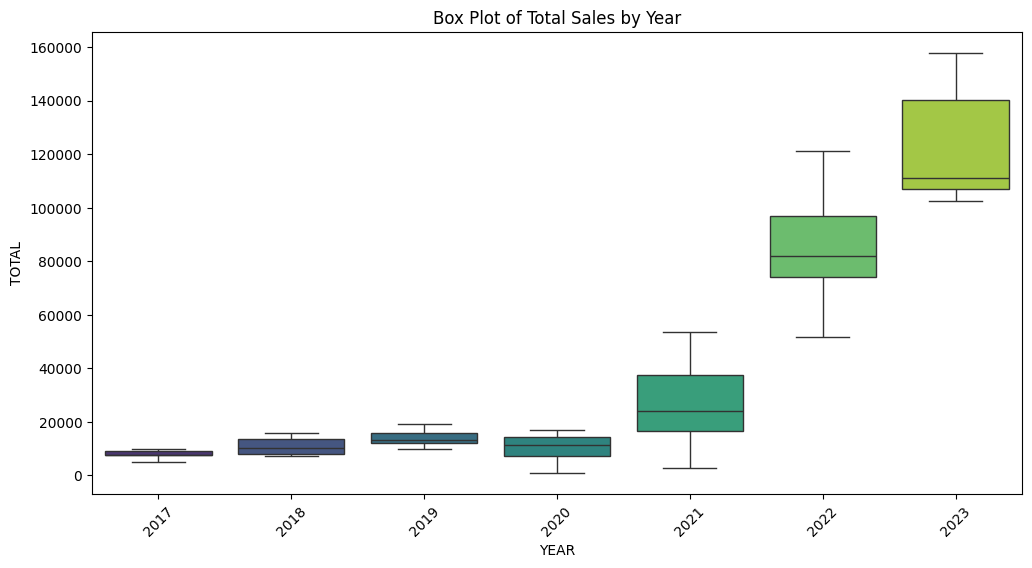

In [31]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='YEAR', y='TOTAL', data=features_ev_sales, palette='viridis')
plt.title('Box Plot of Total Sales by Year')
plt.xticks(rotation=45)
plt.show()

<ipython-input-32-f82abff2fef8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=col, data=features_ev_sales, palette='viridis')
<ipython-input-32-f82abff2fef8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=col, data=features_ev_sales, palette='viridis')
<ipython-input-32-f82abff2fef8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=col, data=features_ev_sales, palette='viridis')
<ipython-input-32-f82abff2fef8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assig

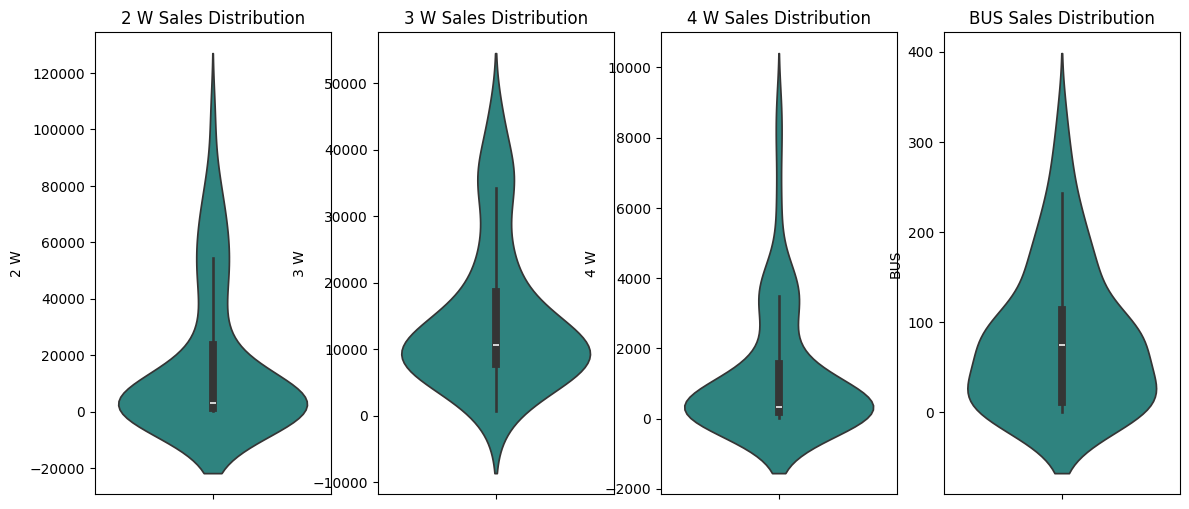

In [32]:
plt.figure(figsize=(14, 6))
for i, col in enumerate(['2 W', '3 W', '4 W', 'BUS'], 1):
    plt.subplot(1, 4, i)
    sns.violinplot(y=col, data=features_ev_sales, palette='viridis')
    plt.title(f'{col} Sales Distribution')
plt.show()